Kaggle:-
https://www.kaggle.com/c/covid19-global-forecasting-week-2/overview

Reference:-
https://www.kaggle.com/corochann/covid-19-eda-with-recent-update-on-march


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('train.csv')
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [25]:
df.Province_State.unique()[0:5]

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland'], dtype=object)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 6 columns):
Id                19698 non-null int64
Province_State    8375 non-null object
Country_Region    19698 non-null object
Date              19698 non-null object
ConfirmedCases    19698 non-null float64
Fatalities        19698 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 923.5+ KB


In [27]:
df.Country_Region.nunique()

173

In [28]:
# Converting date column  from object to Datetime type
df['mydate']= pd.to_datetime(df['Date'],yearfirst=True)

In [29]:
india=df[df['Country_Region']=='India']
italy=df[df['Country_Region']=='Italy']
us=df[df['Country_Region']=='US']

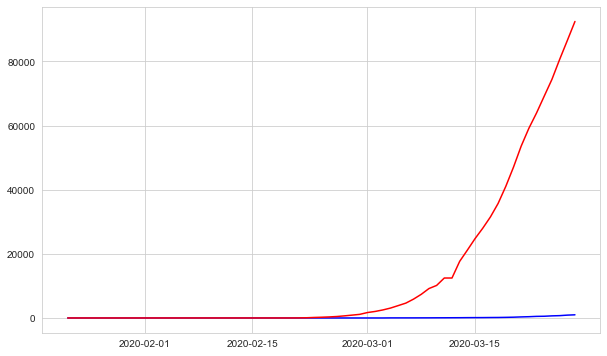

In [30]:
# Date Vs ConfirmedCases
plt.figure(figsize=(10,6))
#plt.yscale('log')
plt.plot(india['mydate'],india['ConfirmedCases'],'b',scalex=True, scaley=True)
plt.plot(italy['mydate'],italy['ConfirmedCases'],'r')

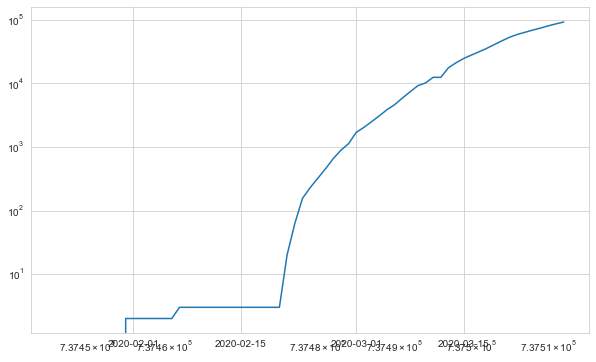

In [31]:
# Since US data is given as per Provincial state wise, the dates are overlapping
''' same for below countries
Canada
Australia
China
Denmark
France
Netherlands
United Kingdom
'''
# Cases for Italy are rising exponentially hence using log plot
plt.figure(figsize=(10,6))
plt.loglog(italy['mydate'],italy['ConfirmedCases'])

In [32]:
#Right now  , I dont need Provincial data,just looking countrywise
us_grp=us.groupby(by=['mydate']).sum().reset_index()

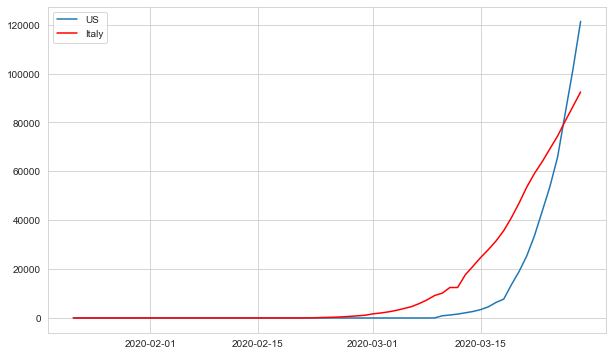

In [33]:
plt.figure(figsize=(10,6))
one='US'
two='Italy'
plt.plot(us_grp['mydate'],us_grp['ConfirmedCases'],label='US')
plt.plot(italy['mydate'],italy['ConfirmedCases'],'r',label='Italy')
plt.legend()

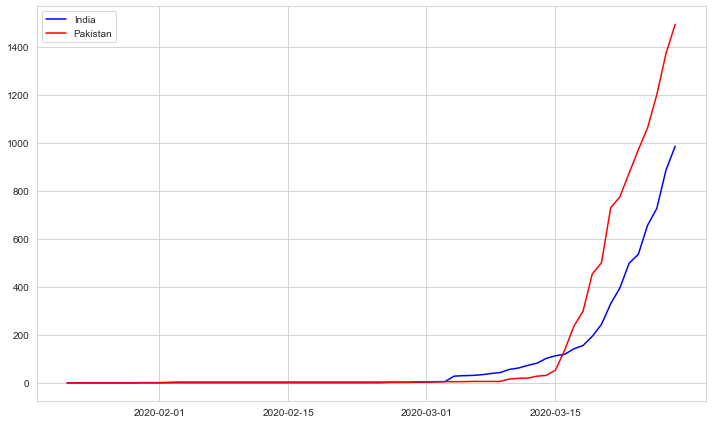

In [34]:
arg=['India','Pakistan']
c1=df[df['Country_Region']==arg[0]]
c2=df[df['Country_Region']==arg[1]]
plt.figure(figsize=(10,6))

#df.groupby('Country_Region')['mydate'].get_group('India')

plt.plot(c1['mydate'],c1['ConfirmedCases'],'b',label=arg[0])
plt.plot(c2['mydate'],c2['ConfirmedCases'],'r',label=arg[1])
plt.legend()
plt.tight_layout()

# World Wide trend

In [35]:
df1=df.groupby(['Country_Region','Province_State'])['ConfirmedCases','Fatalities'].agg('sum').reset_index()
df1.sort_values(by='ConfirmedCases',ascending=False).head()

#plt.figure(figsize=(10,6))
#plt.plot(df1['mydate'],df1['ConfirmedCases'])
#plt.legend()
#plt.tight_layout()

,Country_Region,Province_State,ConfirmedCases,Fatalities
31,China,Hubei,3233890.0,130749.0
98,US,New York,261321.0,2590.0
23,China,Guangdong,74255.0,305.0
29,China,Henan,68185.0,966.0
50,China,Zhejiang,67430.0,38.0


In [36]:
df_last_day=df[df['mydate']=='3/28/2020']#['Country_Region']

In [37]:
df_last_day['Country_Region'].value_counts()

US               54
China            33
France           10
Canada           10
Australia         8
                 ..
Cote d'Ivoire     1
Holy See          1
Finland           1
Slovakia          1
Iceland           1
Name: Country_Region, Length: 173, dtype: int64

In [38]:
df_last_day[df_last_day['Country_Region']=='US']['ConfirmedCases'].sum()

121326.0

In [39]:
df_last_day[df_last_day['Country_Region']=='US'].head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,mydate
15074,22467,Alabama,US,2020-03-28,694.0,4.0,2020-03-28
15141,22567,Alaska,US,2020-03-28,85.0,2.0,2020-03-28
15208,22667,Arizona,US,2020-03-28,773.0,15.0,2020-03-28
15275,22767,Arkansas,US,2020-03-28,409.0,5.0,2020-03-28
15342,22867,California,US,2020-03-28,5095.0,110.0,2020-03-28


In [40]:
df_last_day=df_last_day.groupby('Country_Region').sum().reset_index()

In [41]:
df_last_day.sort_values(by='ConfirmedCases',ascending=False)

,Country_Region,Id,ConfirmedCases,Fatalities
162,US,1356318,121326.0,2023.0
81,Italy,14067,92472.0,10023.0
33,China,216711,81999.0,3299.0
147,Spain,20967,73235.0,5982.0
62,Germany,12167,57695.0,433.0
...,...,...,...,...
134,Saint Kitts and Nevis,19667,2.0,0.0
17,Belize,2467,2.0,0.0
136,Saint Vincent and the Grenadines,19867,1.0,0.0
124,Papua New Guinea,18667,1.0,0.0


In [42]:
#df_last_day_part=df_last_day.loc[['Country_Region']==
#                                 ['Canada','Australia','China','Denmark','France','Netherlands','United Kingdom','US']]
df_last_day_part=df_last_day.set_index('Country_Region')
df_last_day_part=df_last_day_part.loc[['Canada','Australia','China','Denmark','France','Netherlands','United Kingdom','US']]
df_last_day_part=df_last_day_part.reset_index()

In [43]:
df_last_day_part.head()

,Country_Region,Id,ConfirmedCases,Fatalities
0,Canada,41170,5558.0,60.0
1,Australia,9736,3640.0,14.0
2,China,216711,81999.0,3299.0
3,Denmark,27801,2366.0,65.0
4,France,113170,38105.0,2317.0


In [44]:
plt.figure(figsize=(10,6))
df_last_day

,Country_Region,Id,ConfirmedCases,Fatalities
0,Afghanistan,67,110.0,4.0
1,Albania,167,197.0,10.0
2,Algeria,267,454.0,29.0
3,Andorra,367,308.0,3.0
4,Angola,467,5.0,0.0
...,...,...,...,...
168,Uzbekistan,28967,104.0,2.0
169,Venezuela,29067,119.0,2.0
170,Vietnam,29167,174.0,0.0
171,Zambia,29267,28.0,0.0


<Figure size 720x432 with 0 Axes>

In [45]:
world=df.groupby('Date')['ConfirmedCases', 'Fatalities'].sum().reset_index()
world['new_case']=world['ConfirmedCases']-world['ConfirmedCases'].shift(1)
world.head()

,Date,ConfirmedCases,Fatalities,new_case
0,2020-01-22,554.0,17.0,NaN
1,2020-01-23,653.0,18.0,99.0
2,2020-01-24,939.0,26.0,286.0
3,2020-01-25,1432.0,42.0,493.0
4,2020-01-26,2113.0,56.0,681.0


In [48]:
ww_melt_df = pd.melt(world, id_vars=['Date'], value_vars=['ConfirmedCases', 'Fatalities','new_case'])
ww_melt_df.head()

,Date,variable,value
0,2020-01-22,ConfirmedCases,554.0
1,2020-01-23,ConfirmedCases,653.0
2,2020-01-24,ConfirmedCases,939.0
3,2020-01-25,ConfirmedCases,1432.0
4,2020-01-26,ConfirmedCases,2113.0


In [49]:
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"


fig = px.line(ww_melt_df, x="Date", y="value", color='variable', 
              title="Worldwide Confirmed/Death Cases Over Time")
fig.show()

In [51]:
fig = px.line(ww_melt_df, x="Date", y="value", color='variable',
              title="Worldwide Confirmed/Death Cases Over Time (Log scale)",
             log_y=True)
fig.show()

# Country wise

In [52]:
# First grp by Date & then Country
country_df = df.groupby(['Date', 'Country_Region'])['ConfirmedCases', 'Fatalities'].sum().reset_index()
country_df.tail()

,Date,Country_Region,ConfirmedCases,Fatalities
11586,2020-03-28,Uzbekistan,104.0,2.0
11587,2020-03-28,Venezuela,119.0,2.0
11588,2020-03-28,Vietnam,174.0,0.0
11589,2020-03-28,Zambia,28.0,0.0
11590,2020-03-28,Zimbabwe,7.0,1.0


In [54]:
target_date = country_df['Date'].max()
print(target_date)

2020-03-28


In [57]:
for i in [1, 10, 100, 1000, 10000]:
    n_countries = len(country_df.query('(Date == @target_date) & ConfirmedCases > @i'))
    print(f'{n_countries} countries have more than {i} confirmed cases')

170 countries have more than 1 confirmed cases
132 countries have more than 10 confirmed cases
99 countries have more than 100 confirmed cases
40 countries have more than 1000 confirmed cases
9 countries have more than 10000 confirmed cases


In [62]:
country_df.query('Date == "2020-03-28"').head()

,Date,Country_Region,ConfirmedCases,Fatalities
11418,2020-03-28,Afghanistan,110.0,4.0
11419,2020-03-28,Albania,197.0,10.0
11420,2020-03-28,Algeria,454.0,29.0
11421,2020-03-28,Andorra,308.0,3.0
11422,2020-03-28,Angola,5.0,0.0


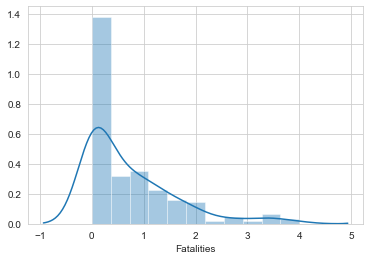

In [67]:
ax=sns.distplot(np.log10(country_df.query('Date == "2020-03-28"')['Fatalities']+1))

In [70]:
top_country_df = country_df.query('(Date == @target_date) & (ConfirmedCases > 1000)').sort_values('ConfirmedCases', ascending=False)
top_country_melt_df = pd.melt(top_country_df, id_vars='Country_Region', value_vars=['ConfirmedCases', 'Fatalities'])

In [72]:
top_country_df.head()

,Date,Country_Region,ConfirmedCases,Fatalities
11580,2020-03-28,US,121326.0,2023.0
11499,2020-03-28,Italy,92472.0,10023.0
11451,2020-03-28,China,81999.0,3299.0
11565,2020-03-28,Spain,73235.0,5982.0
11480,2020-03-28,Germany,57695.0,433.0


In [73]:
top_country_melt_df.head()

,Country_Region,variable,value
0,US,ConfirmedCases,121326.0
1,Italy,ConfirmedCases,92472.0
2,China,ConfirmedCases,81999.0
3,Spain,ConfirmedCases,73235.0
4,Germany,ConfirmedCases,57695.0


In [78]:
fig = px.bar(top_country_melt_df.iloc[::-1],
             x='value', y='Country_Region', color='variable', barmode='group',
             title=f'Confirmed Cases/Deaths on {target_date}', text='value', height=800, orientation='h')
fig.show()

In [95]:
# lets check top 10 countries

top10_countries = top_country_df.sort_values('ConfirmedCases', ascending=False).iloc[:10]['Country_Region'].unique()
top10_countries_df = country_df[country_df['Country_Region'].isin(top10_countries)]
fig = px.line(top10_countries_df,
              x='Date', y='ConfirmedCases', color='Country_Region',
              title=f'Confirmed Cases for top 10 country as of {target_date}')
fig.show()

In [97]:
top10_countries = top_country_df.sort_values('Fatalities', ascending=False).iloc[:10]['Country_Region'].unique()
top10_countries_df = country_df[country_df['Country_Region'].isin(top10_countries)]
fig = px.line(top10_countries_df,
              x='Date', y='Fatalities', color='Country_Region',
              title=f'Fatalities for top 10 country as of {target_date}')
fig.show()

In [106]:
#world['new_case']